<a href="https://colab.research.google.com/github/shubhicode7/covid19-data-analysis/blob/main/task2_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#task 2


In [ ]:
# task2_ml_prediction.ipynb

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Data
import pandas as pd
df = pd.read_csv('/content/complete.csv')
df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [ ]:
# Step 3: Preprocessing
df['Death'] = pd.to_numeric(df['Death'], errors='coerce')  # convert to numeric
df.dropna(inplace=True)

In [ ]:
print(df.shape)

(4691, 10)


In [ ]:
# Step 4: Feature Selection
features = ['Total Confirmed cases', 'Cured/Discharged/Migrated', 'Death', 'New deaths', 'New recovered']
X = df[features]
y = df['New cases']

In [ ]:
# Step 5: Train-Test Split
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (4691, 5)
y shape: (4691,)


,Total Confirmed cases,Cured/Discharged/Migrated,Death,New deaths,New recovered
0,1.0,0.0,0.0,0,0
1,1.0,0.0,0.0,0,0
2,2.0,0.0,0.0,0,0
3,3.0,0.0,0.0,0,0
4,3.0,0.0,0.0,0,0


In [ ]:
print(X.head())  # features ka preview
print(y.head())  # target column ka preview

   Total Confirmed cases  Cured/Discharged/Migrated  Death  New deaths  \
0                    1.0                        0.0    0.0           0   
1                    1.0                        0.0    0.0           0   
2                    2.0                        0.0    0.0           0   
3                    3.0                        0.0    0.0           0   
4                    3.0                        0.0    0.0           0   

   New recovered  
0              0  
1              0  
2              0  
3              0  
4              0  
0    0
1    0
2    1
3    1
4    0
Name: New cases, dtype: int64


In [ ]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3752, 5)
Test set size: (939, 5)


In [ ]:
X_train.head()

,Total Confirmed cases,Cured/Discharged/Migrated,Death,New deaths,New recovered
618,9.0,3.0,0.0,0,1
3832,479.0,245.0,0.0,0,19
2446,27.0,12.0,1.0,0,0
2751,4448.0,2134.0,28.0,0,0
1941,13.0,11.0,1.0,0,1


In [ ]:
# Step 6: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 7: Prediction
y_pred = model.predict(X_test)

In [ ]:
# Compare predicted vs actual
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
print(comparison_df)

   Actual   Predicted
0       0    0.058333
1       6   34.560000
2       0   10.098333
3       0    0.000000
4       0    7.375000
5       2    6.790000
6     249  273.710000
7      33   37.650000
8      44   82.693333
9       0    0.000000


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Show sample predictions
print("First 5 predictions:", y_pred[:5])

# Compare with actual values
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
print("\nActual vs Predicted (first 10 rows):")
print(comparison_df)

First 5 predictions: [ 0.05833333 34.56       10.09833333  0.          7.375     ]

Actual vs Predicted (first 10 rows):
   Actual   Predicted
0       0    0.058333
1       6   34.560000
2       0   10.098333
3       0    0.000000
4       0    7.375000
5       2    6.790000
6     249  273.710000
7      33   37.650000
8      44   82.693333
9       0    0.000000


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 177136.22473495308
R² Score: 0.9079903159624348


In [ ]:
# Step 8: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 177136.22473495308
R2 Score: 0.9079903159624348


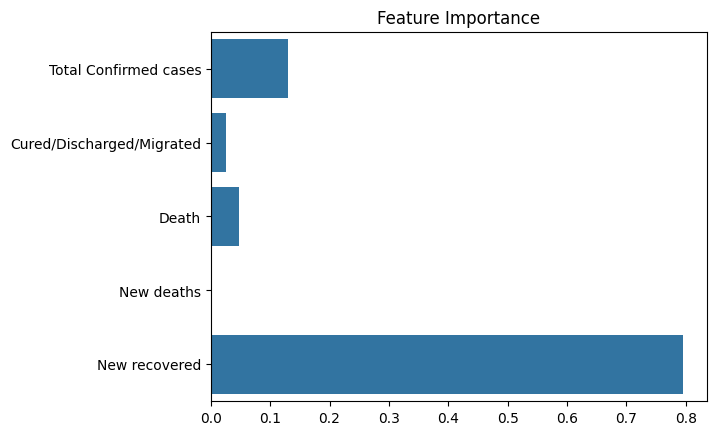

In [ ]:
# Step 9: Feature Importance Plot
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()